<a href="https://colab.research.google.com/github/Bharath-Mani/Machine-Learning/blob/main/KMEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"Country-data.csv", header=0)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
X = df.drop(columns=['country'])

In [8]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features)
])

X_processed = preprocessor.fit_transform(X)
X_processed.shape

(167, 9)

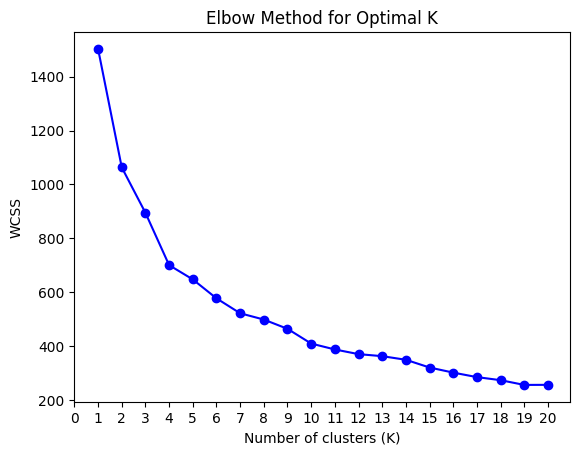

In [9]:
wcss = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    n_init=10
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(21), labels=range(21))
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, n_init=100, random_state=0)
kmeans.fit(X_processed)
labels = kmeans.labels_


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plot_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Clusters': labels.astype(str)
})

centroids_df = pd.DataFrame(centroids_pca, columns=['PCA1', 'PCA2'])


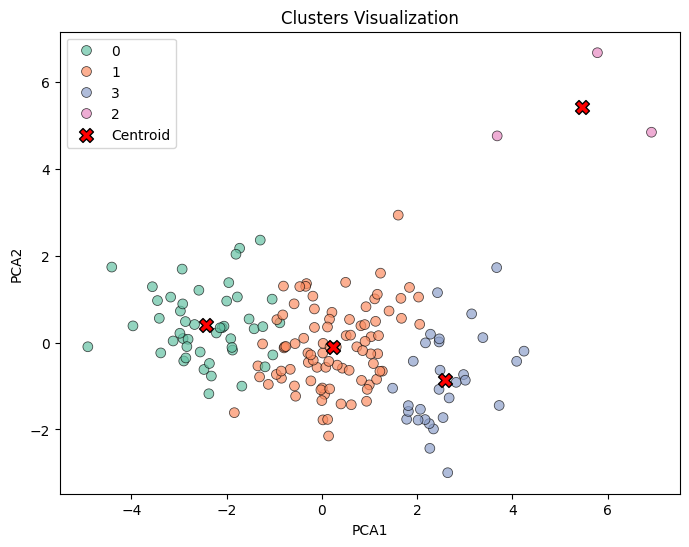

In [17]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=plot_df,
    x='PCA1',
    y='PCA2',
    hue='Clusters',
    palette='Set2',
    s=50,
    alpha=0.7,
    edgecolors='k'
)

plt.scatter(
    centroids_df['PCA1'],
    centroids_df['PCA2'],
    c='red',
    s=100,
    marker='X',
    edgecolor='black',
    label='Centroid'
)

plt.title("Clusters Visualization")
plt.legend()
plt.show()